In [1]:
# Importing standard libraries
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
# Importing fastAI libraries
from fastai.collab import *
from fastai.tabular import *
# Fixing Attribute error
get_ipython().config.get('IPKernelApp', {})['parent_appname'] = ""

## Importing Data

In [16]:
df_main = pd.read_csv('Journal lines.csv')

In [17]:
df_main.head()

,Amount,Date effective,Date posted,Journal description,Journal ID,Journal line number,GL account,Document Type,Posting user
0,0.00,21/07/2016,21/07/2016,**********,Journal ID 45791,4597213,1310,201.0,User 18
1,0.00,21/07/2016,21/07/2016,*********,Journal ID 46617,4597214,1310,501.0,User 18
2,-42927.28,21/07/2016,21/07/2016,*************************,Journal ID 65540,4597454,1310,NaN,User 18
3,-21092.41,21/07/2016,21/07/2016,*******,Journal ID 65540,4597455,1310,NaN,User 18
4,0.00,21/07/2016,21/07/2016,*****************************,Journal ID 65540,4597465,1310,NaN,User 18


In [18]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304369 entries, 0 to 304368
Data columns (total 9 columns):
Amount                 304369 non-null float64
Date effective         304369 non-null object
Date posted            304369 non-null object
Journal description    304362 non-null object
Journal ID             304369 non-null object
Journal line number    304369 non-null int64
GL account             304369 non-null int64
Document Type          247431 non-null float64
Posting user           304369 non-null object
dtypes: float64(2), int64(2), object(5)
memory usage: 20.9+ MB


## Cleaning Data

In [19]:
df = df_main[['Journal ID','GL account','Amount']]

In [20]:
df.head()

,Journal ID,GL account,Amount
0,Journal ID 45791,1310,0.00
1,Journal ID 46617,1310,0.00
2,Journal ID 65540,1310,-42927.28
3,Journal ID 65540,1310,-21092.41
4,Journal ID 65540,1310,0.00


In [21]:
# Changing column names
df.columns = ['Journal_ID','GL_Account','Amount']
df.head()

,Journal_ID,GL_Account,Amount
0,Journal ID 45791,1310,0.00
1,Journal ID 46617,1310,0.00
2,Journal ID 65540,1310,-42927.28
3,Journal ID 65540,1310,-21092.41
4,Journal ID 65540,1310,0.00


In [23]:
#Getting rid of 'Journal ID' text from data
df.Journal_ID = df.Journal_ID.str.split().apply(lambda x: x[2])

In [24]:
df.head()

,Journal_ID,GL_Account,Amount
0,45791,1310,0.00
1,46617,1310,0.00
2,65540,1310,-42927.28
3,65540,1310,-21092.41
4,65540,1310,0.00


In [30]:
# The problem might be that not all rows are int64 or float64
# Journal ID should be int64
# GL Account should be int64
# Amount should be float64
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304369 entries, 0 to 304368
Data columns (total 3 columns):
Journal_ID    304369 non-null object
GL_Account    304369 non-null int64
Amount        304369 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 7.0+ MB


In [36]:
df['Journal_ID'].astype(np.int64).head(1)
df['GL_Account'].astype(np.int64).head(1)
df = df.convert_objects(convert_numeric=True)

C:\Users\zaziz\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until


In [37]:
# Checking whether everything is correct format
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304369 entries, 0 to 304368
Data columns (total 3 columns):
Journal_ID    304369 non-null int64
GL_Account    304369 non-null int64
Amount        304369 non-null float64
dtypes: float64(1), int64(2)
memory usage: 7.0 MB


# Grouped Data

In [42]:
df.to_csv('test.csv')

In [120]:
# ClEANING DATA BY SUMMING THE VALUES in the same ID + Account

df_grouped = df.groupby(['Journal_ID','GL_Account'])['Amount'].sum().reset_index()

In [121]:
df_grouped.head()

,Journal_ID,GL_Account,Amount
0,1,1265,-7.106944e+04
1,1,3320,7.106944e+04
2,2,1310,-1.091394e-11
3,3,1310,0.000000e+00
4,4,1265,-3.000000e+01


In [122]:
df_grouped.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190838 entries, 0 to 190837
Data columns (total 3 columns):
Journal_ID    190838 non-null int64
GL_Account    190838 non-null int64
Amount        190838 non-null float64
dtypes: float64(1), int64(2)
memory usage: 4.4 MB


In [56]:
df_grouped.to_csv('test_2.csv')

Grouping up the data as above definitely seems the way to go. It also reduced our data size to half.

## Modelling

## Attempt 1

In [26]:
#??CollabDataBunch


In [38]:
data = CollabDataBunch.from_df(df, seed=42)

In [39]:
learn = collab_learner(data, n_factors=50) # what is n_factors?

In [41]:
# 3 epochs
# learning rate 0.005
learn.fit_one_cycle(3, 5e-3)

epoch,train_loss,valid_loss
1,75654676480.000000,26814281728.000000
2,7054614528.000000,26812973056.000000
3,77721264128.000000,26812624896.000000


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


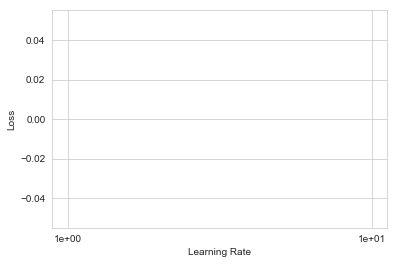

In [126]:
learn.lr_find()
learn.recorder.plot(skip_end=15)

In [128]:
journal_weights = learn.weight(data, is_item=False)

TypeError: 'TabularDataBunch' object is not iterable

## Attempt 2 - grouped the data

In [123]:
gdata = CollabDataBunch.from_df(df_grouped, seed=42)

In [61]:
gdata.show_batch()

Journal_ID,GL_Account,target
36554,3620,-303.89
14628,3620,-514.8
24528,1310,19712.0
18097,6210,-3227.3
34268,3620,-1752.88


AttributeError: 'NoneType' object has no attribute 'head'

In [127]:
learn = collab_learner(gdata, n_factors=50) # n_factors is width of the embedding matrix

In [54]:
# 3 epochs
# learning rate 0.005
learn.fit_one_cycle(3, 5e-3)

epoch,train_loss,valid_loss
1,37844533248.000000,10117045248.000000
2,26792986624.000000,10116703232.000000
3,56834560000.000000,10116598784.000000


In [125]:
# LOWER LEARNING RATE
learn.fit_one_cycle(3, 5e-5)

epoch,train_loss,valid_loss
1,9169091584.000000,10117111808.000000
2,55963258880.000000,10117111808.000000
3,421177524224.000000,10117111808.000000


In [128]:
# LOWER LEARNING RATE
learn.fit_one_cycle(3, 5e-8)

epoch,train_loss,valid_loss
1,18979041280.000000,10117111808.000000


KeyboardInterrupt: 

It seems like the training loss got better and then worse !

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


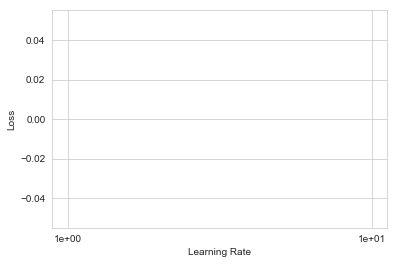

In [57]:
learn.lr_find()
learn.recorder.plot(skip_end=15)

# Interpreting Bias

In [58]:
learn.save('dotprod')

In [59]:
learn.model

EmbeddingDotBias(
  (u_weight): Embedding(64376, 50)
  (i_weight): Embedding(176, 50)
  (u_bias): Embedding(64376, 1)
  (i_bias): Embedding(176, 1)
)

In [71]:
df_grouped.head()

,Journal_ID,GL_Account,Amount
0,1,1265,-7.106944e+04
1,1,3320,7.106944e+04
2,2,1310,-1.091394e-11
3,3,1310,0.000000e+00
4,4,1265,-3.000000e+01


In [72]:
df.head()

,Journal_ID,GL_Account,Amount
0,45791,1310,0.00
1,46617,1310,0.00
2,65540,1310,-42927.28
3,65540,1310,-21092.41
4,65540,1310,0.00


### Looking at accounts that many transactions go through

In [107]:
g = df.groupby('GL_Account')['Amount'].count()

In [115]:
top_accounts = g.sort_values(ascending=False).index.values[:60000]

In [116]:
top_accounts = top_accounts.astype('U')

In [117]:
top_accounts[:10]

array(['1310', '3620', '6210', '6510', '1281', '3630', '3320', '3310', '6710', '3430'], dtype='<U21')

In [118]:
account_bias = learn.bias(top_accounts, is_item=True)

KeyError: '1820'